**About the Fitness Equipment Company**

The fitness equipment company is a prominent player in the industry, offering a diverse range of products, including treadmills, exercise bikes, gym equipment, and various fitness accessories. These products are designed to cater to the unique needs of a wide array of customers.

**Business Challenge**

The research team of the fitness equipment company aims to gain a deeper understanding of the distinctive characteristics of their target audience for each type of treadmill product. The goal is to enhance recommendations provided to new customers, tailoring the suggestions based on individual preferences. The team is eager to explore potential differences in customer characteristics across various treadmill products.

**Problem Statement**

The central question the research aims to answer is: "Are there discernible differences in customer characteristics across the various treadmill products?" By systematically examining conditional and marginal probabilities through two-way contingency tables, the research seeks to uncover patterns that can significantly impact business decisions. The insights derived from this analysis will be instrumental in refining customer recommendations and tailoring marketing strategies for each treadmill product.

**Product Portfolio:**

1. **KP281:**
   - Type: Entry-Level Treadmill
   - Price: $1,500

2. **KP481:**
   - Type: Mid-Level Runner's Treadmill
   - Price: $1,750

3. **KP781:**
   - Type: Advanced Features Treadmill
   - Price: $2,500

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('treadmill.txt')

In [2]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## 1. Structure and characteristics of dataset

In [3]:
df.shape

(180, 9)

### 180 rows and 9 columns

In [4]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

### String columns: Product, Gender, MaritalStatus. 
### Integer columns: Age, Education, Usage, Fitness, Income, Miles

In [5]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### No missing values

## 2. Outliers

### Boxplots and Countplots of all numerical columns

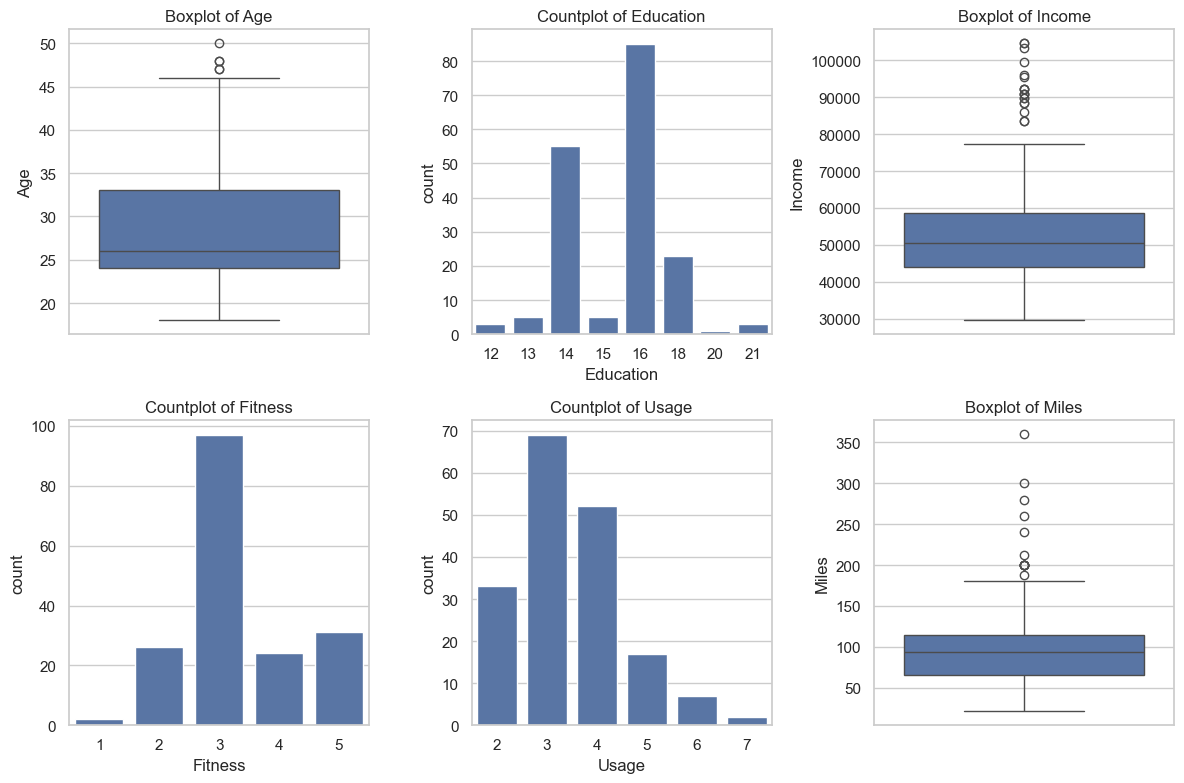

In [6]:
def outlier_checker(data, columns):
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")

    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)

        if column in ['Fitness', 'Usage','Education']:
            sns.countplot(x=data[column])
            plt.title(f'Countplot of {column}')
        else:
            sns.boxplot(y=data[column])
            plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()
outlier_checker(df,['Age', 'Education', 'Income', 'Fitness', 'Usage', 'Miles'])

### Filtering data between Q1-1.5*iqr and Q3+1.5*iqr for each numerical columns

In [7]:
columns = ['Age', 'Education', 'Usage', 'Fitness', 'Miles','Income']
def filter_data_by_iqr(df, column):
    iqr = np.quantile(df[column], 0.75) - np.quantile(df[column], 0.25)
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    return df[df[column].between(q1 - 1.5 * iqr, q3 + 1.5 * iqr)]
for column in columns:
    df = filter_data_by_iqr(df, column)
df.shape

(146, 9)

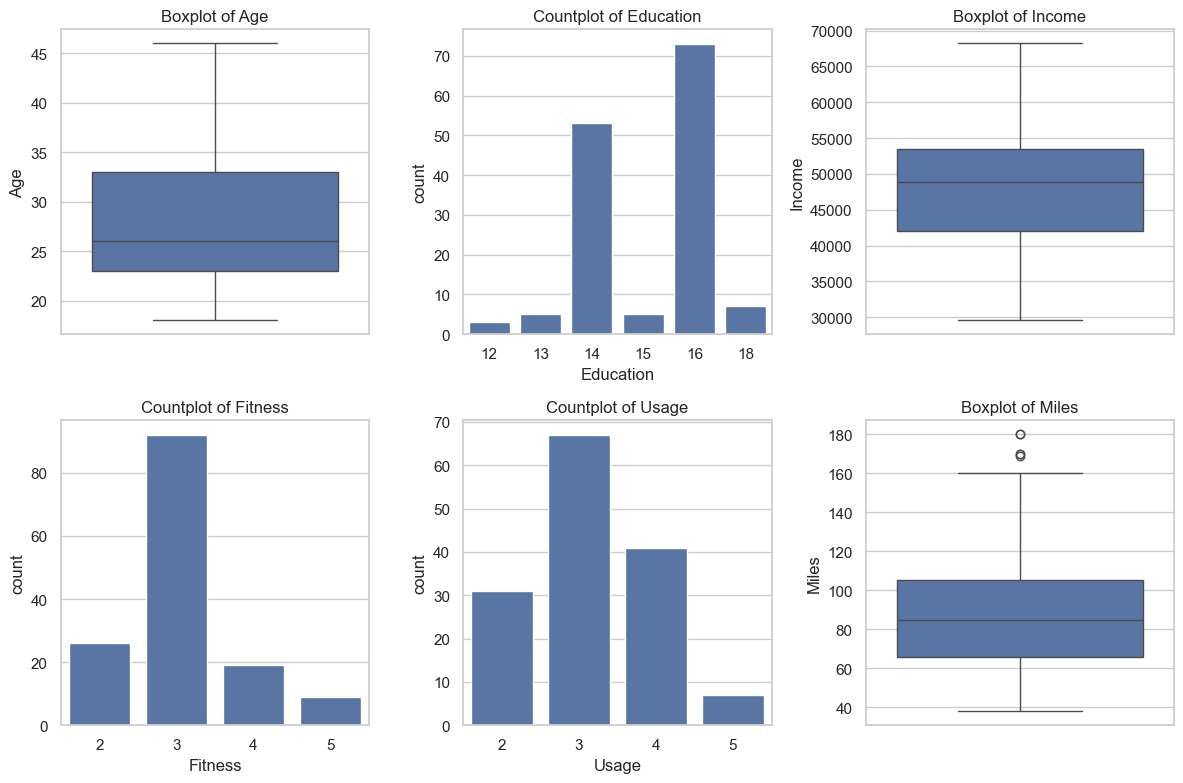

In [8]:
outlier_checker(df,['Age', 'Education', 'Income', 'Fitness', 'Usage', 'Miles'])

### 34 outlier records removed.
### As we can see in the second series of plots there are hardly any more outliers.

In [9]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,28.006849,15.150685,3.164384,3.075342,48053.650685,88.034247
std,6.259334,1.266777,0.813908,0.743576,8852.564836,30.364093
min,18.000000,12.000000,2.000000,2.000000,29562.000000,38.000000
25%,23.000000,14.000000,3.000000,3.000000,42069.000000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,48891.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,53439.000000,105.250000
max,46.000000,18.000000,5.000000,5.000000,68220.000000,180.000000


## 3. Checking if MaritalStatus,Gender,Age influences the product purchased

In [10]:
g=df.groupby('MaritalStatus',as_index=False)['Product'].value_counts()
g

,MaritalStatus,Product,count
0,Partnered,KP281,44
1,Partnered,KP481,34
2,Partnered,KP781,5
3,Single,KP281,32
4,Single,KP481,23
5,Single,KP781,8


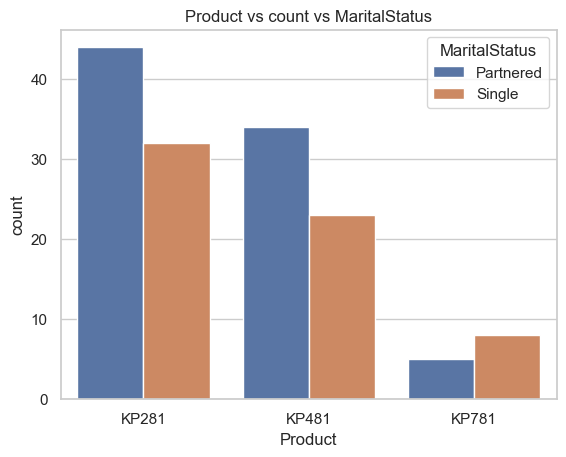

In [11]:
sns.set(style="whitegrid")
sns.barplot(x='Product',y='count',hue='MaritalStatus',data=g)
plt.title('Product vs count vs MaritalStatus')
plt.show()

In [12]:
g=df.groupby('Gender',as_index=False)['Product'].value_counts()
g

,Gender,Product,count
0,Female,KP281,38
1,Female,KP481,27
2,Female,KP781,1
3,Male,KP281,38
4,Male,KP481,30
5,Male,KP781,12


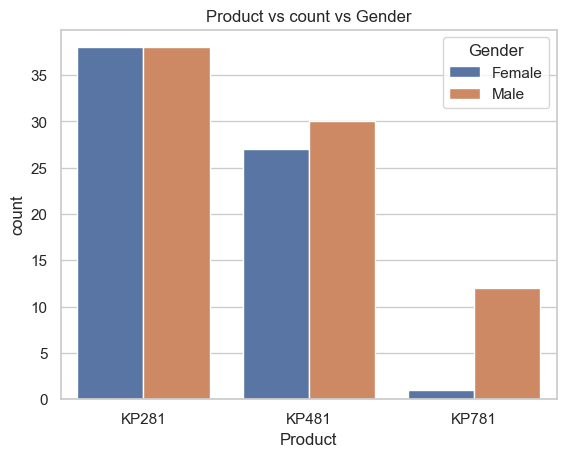

In [13]:
sns.set(style="whitegrid")
sns.barplot(x='Product',y='count',hue='Gender',data=g)
plt.title('Product vs count vs Gender')
plt.show()

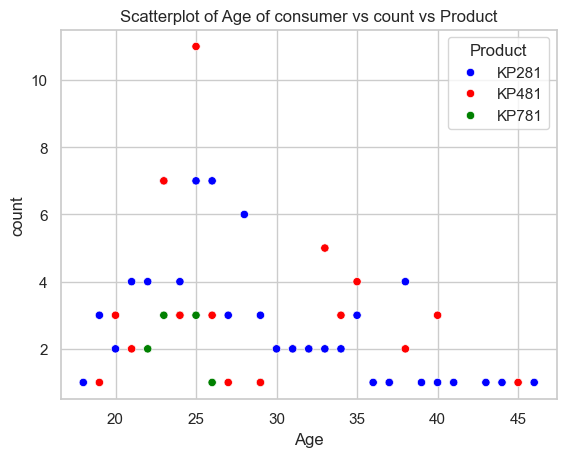

In [14]:
g=df.groupby('Age',as_index=False)['Product'].value_counts()
sns.scatterplot(data=g,x='Age',y='count',hue='Product',palette={'KP281':'blue','KP481':'red','KP781':'green'})
plt.title('Scatterplot of Age of consumer vs count vs Product')
plt.show()

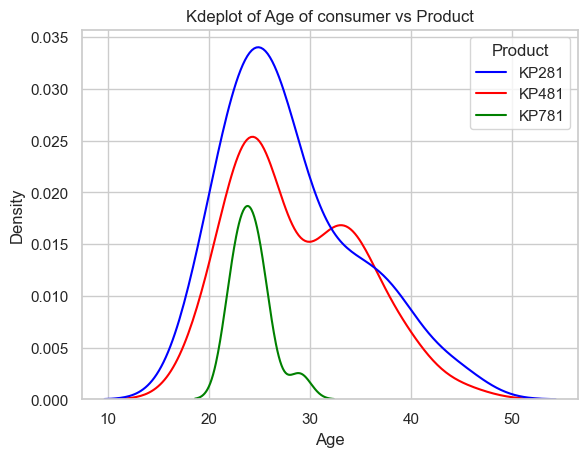

In [15]:
sns.kdeplot(data=df,x='Age',hue='Product',palette={'KP281':'blue','KP481':'red','KP781':'green'})
plt.title('Kdeplot of Age of consumer vs Product')
plt.show()

- **Treadmill Usage Insights:**
  - **MaritalStatus Preferences:**
    - KP281 and KP481 are more commonly used by partnered individuals.
    - KP781 is more common among single individuals.

  - **Gender Preferences:**
    - KP281 is equally preferred by female and male.
    - KP481 and KP781 are favored by a larger male consumer base.

  - **Age Group Preferences:**
    - KP281 is popular across all age groups.
    - KP481 is the most popular model in the 31-35 age group.
    - KP781 is mostly used by individuals aged 20-26.

## 4. Representing the Probability

- **Marginal Probabilities for Treadmill Models and Relationship Status/Gender:**

In [16]:
pd.crosstab(df['Product'],[df['MaritalStatus'],df['Gender']],margins=True,normalize=True)

MaritalStatus Partnered              Single                 All
Gender           Female      Male    Female      Male          
Product                                                        
KP281          0.171233  0.130137  0.089041  0.130137  0.520548
KP481          0.095890  0.136986  0.089041  0.068493  0.390411
KP781          0.000000  0.034247  0.006849  0.047945  0.089041
All            0.267123  0.301370  0.184932  0.246575  1.000000

- **Treadmill Models:**
  - P(KP281) = 52.05%
  - P(KP481) = 39.04%
  - P(KP781) = 8.90%

- **Relationship Status and Gender:**
  - P(Partnered Female) = 26.71%
  - P(Partnered Male) = 30.13%
  - P(Single Female) = 18.49%
  - P(Single Male) = 24.66%

- **Joint Probabilities for Treadmill Models and Relationship Status/Gender:**

In [17]:
pd.crosstab(df['Product'],[df['MaritalStatus'],df['Gender']],normalize=True)

MaritalStatus Partnered              Single          
Gender           Female      Male    Female      Male
Product                                              
KP281          0.171233  0.130137  0.089041  0.130137
KP481          0.095890  0.136986  0.089041  0.068493
KP781          0.000000  0.034247  0.006849  0.047945

#### For KP281:
- P(KP281 and Partnered Female) = 17.12%
- P(KP281 and Partnered Male) = 13.01%
- P(KP281 and Single Female) = 8.90%
- P(KP281 and Single Male) = 13.01%

#### For KP481:
- P(KP481 and Partnered Female) = 9.59%
- P(KP481 and Partnered Male) = 13.70%
- P(KP481 and Single Female) = 8.90%
- P(KP481 and Single Male) = 6.85%

#### For KP781:
- P(KP781 and Partnered Female) = 0.0%
- P(KP781 and Partnered Male) = 3.42%
- P(KP781 and Single Female) = 0.68%
- P(KP781 and Single Male) = 4.79%

- **Conditional Probabilities for Treadmill Models given Relationship Status/Gender:**

In [18]:
pd.crosstab(df['Product'],[df['MaritalStatus'],df['Gender']],normalize='columns')

MaritalStatus Partnered              Single          
Gender           Female      Male    Female      Male
Product                                              
KP281          0.641026  0.431818  0.481481  0.527778
KP481          0.358974  0.454545  0.481481  0.277778
KP781          0.000000  0.113636  0.037037  0.194444

#### For KP281:
- P(KP281 | Partnered Female) = 64.1%
- P(KP281 | Partnered Male) = 43.18%
- P(KP281 | Single Female) = 48.15%
- P(KP281 | Single Male) = 52.78%

#### For KP481:
- P(KP481 | Partnered Female) = 35.90%
- P(KP481 | Partnered Male) = 45.45%
- P(KP481 | Single Female) = 48.15%
- P(KP481 | Single Male) = 27.78%

#### For KP781:
- P(KP781 | Partnered Female) = 0.0%
- P(KP781 | Partnered Male) = 11.36%
- P(KP781 | Single Female) = 3.7%
- P(KP781 | Single Male) = 19.44%

- **Conditional Probabilities for Relationship Status/Gender given Treadmill Models:**

In [19]:
pd.crosstab(df['Product'],[df['MaritalStatus'],df['Gender']],normalize='index')

MaritalStatus Partnered              Single          
Gender           Female      Male    Female      Male
Product                                              
KP281          0.328947  0.250000  0.171053  0.250000
KP481          0.245614  0.350877  0.228070  0.175439
KP781          0.000000  0.384615  0.076923  0.538462

#### For Partnered:
- P(Partnered Female | KP281) = 32.89%
- P(Partnered Female | KP481) = 24.56%
- P(Partnered Female | KP781) = 0.00
- P(Partnered Male | KP281) = 25.00%
- P(Partnered Male | KP481) = 35.09%
- P(Partnered Male | KP781) = 38.46%


#### For Single:
- P(Single Female | KP281) = 17.11
- P(Single Female | KP481) = 22.81
- P(Single Female | KP781) = 7.69
- P(Single Male | KP281) = 25.00
- P(Single Male | KP481) = 17.54
- P(Single Male | KP781) = 53.85

### Key Insights:

1. **Marginal Probabilities:**
   - KP281 is the most popular treadmill model overall followed by KP481 then KP781.
   - Partenered people have higher probability of getting a treadmill.
   - Gender-wise treadmills have higher probability of male users.

2. **Joint Probabilities:**
   - KP281 has good joint probability with partnered male and female and single male.
   - KP481 has good joint porbability with partnered male.

3. **Conditional Probabilities:**
   - Given an user is partnered female there is a high chance that she is KP281 user.
   - Given an user is single male there is a high chance that he is KP281 user.
   - Given an user is KP781 user there is high probability that he is single male.

## 5. Correlation between different features

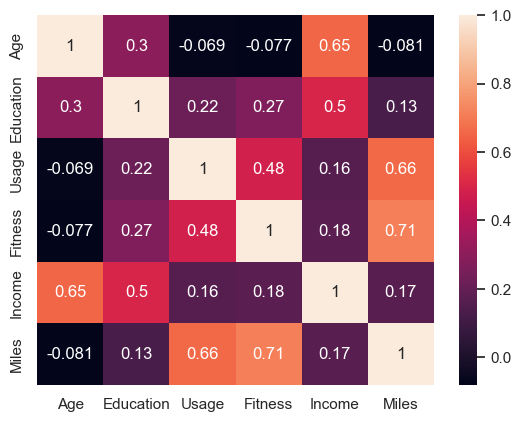

In [20]:
dfn=df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]
sns.heatmap(dfn.corr(),annot=True)
plt.show()

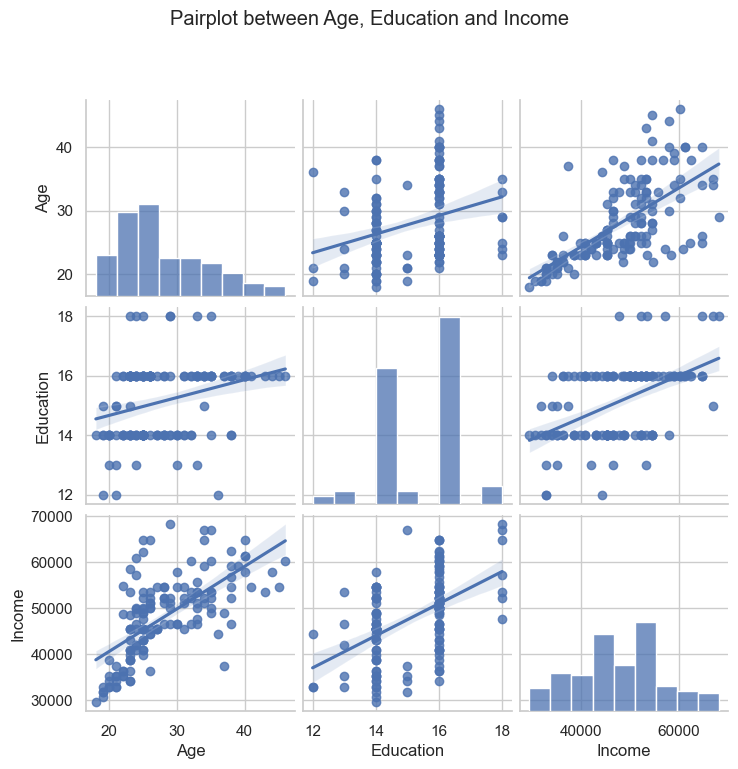

In [21]:
sns.pairplot(df[['Age','Education','Income']],kind='reg')
plt.suptitle("Pairplot between Age, Education and Income", y=1.02) 
plt.subplots_adjust(top=0.9)
plt.show()

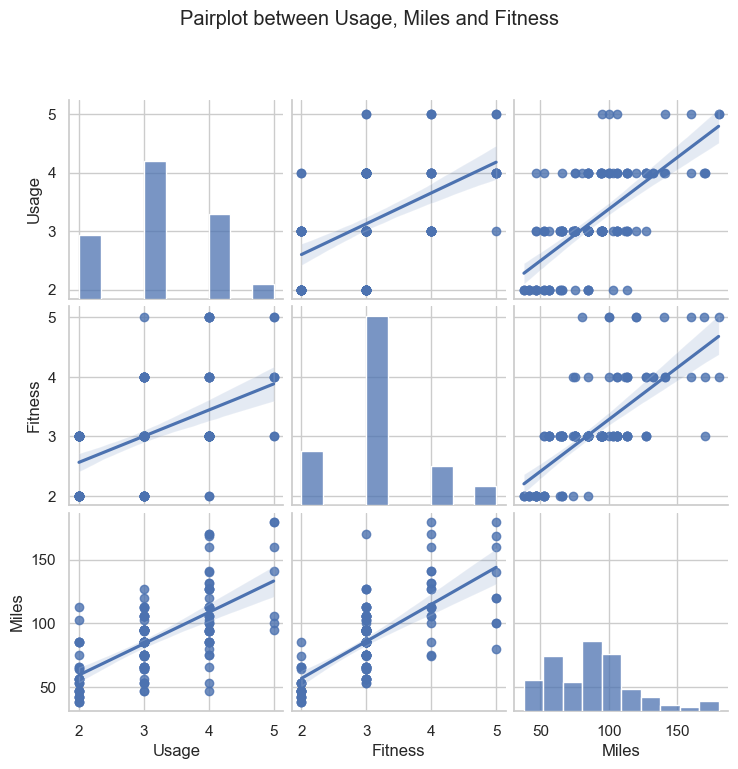

In [22]:
sns.pairplot(df[['Usage','Fitness','Miles']],kind='reg')
plt.suptitle("Pairplot between Usage, Miles and Fitness", y=1.02) 
plt.subplots_adjust(top=0.9)
plt.show()

## Insights from Strong Correlation Coefficients:

1. **Income - Age (0.65):**
   - The strong positive correlation suggests that, on average, as individuals' age increases, their income tends to increase as well.
   - This indicates a potential trend of higher income levels in older age groups.

2. **Education - Income (0.50):**
   - The moderately positive correlation suggests that there is a connection between higher education levels and higher income.
   - Individuals with higher education levels tend to have higher incomes on average.

3. **Usage - Fitness (0.48):**
   - The moderately positive correlation indicates that there is a relationship between the frequency of equipment usage and fitness levels.
   - Individuals who use fitness equipment more frequently tend to have higher fitness levels.

4. **Miles - Usage (0.66):**
   - The strong positive correlation suggests that there is a strong connection between the distance covered (in miles) and the frequency of equipment usage.
   - Users who cover more miles tend to use the equipment more frequently.

5. **Fitness - Miles (0.71):**
   - The strong positive correlation implies a notable connection between fitness levels and the distance covered.
   - Individuals with higher fitness levels are likely to cover more miles during their exercise sessions and more miles covered will increase fitness.

## 6. Customer profiling and recommendation

### Introducing 'Age group' column

In [23]:
df['Age group']=pd.cut(df['Age'],
                       bins=[0,17,25,35,45,55,65,float('inf')],
                       labels=['0-17','18-25','26-35','36-45','46-55','56-65','65+'])

### Segmenting the dataframe based on Product

In [24]:
low=df[df['Product']=='KP281']
low.shape

(76, 10)

In [25]:
mid=df[df['Product']=='KP481']
mid.shape

(57, 10)

In [26]:
high=df[df['Product']=='KP781']
high.shape

(13, 10)

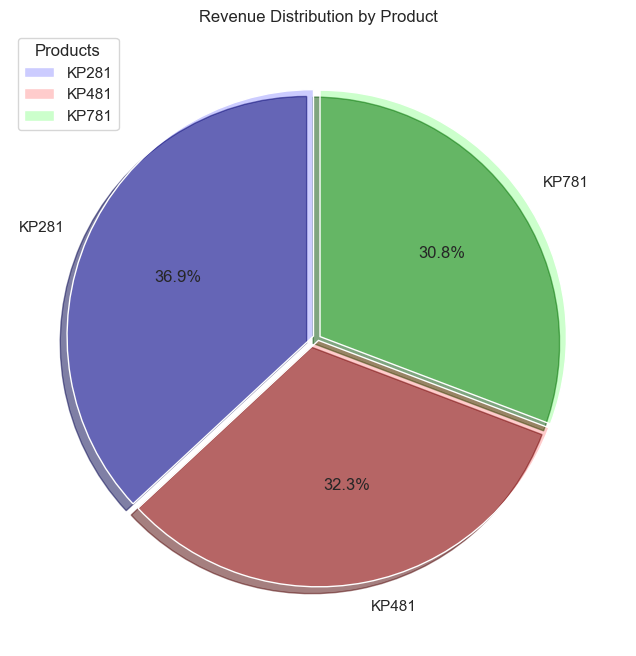

In [27]:
data=pd.read_csv('treadmill.txt')
conditions=[data['Product']=='KP281',data['Product']=='KP481',data['Product']=='KP781']
price=[1500,1750,2500]

# Introducing 'Price' column
data['Price']=np.select(conditions,price,None)
# Grouping sum of 'Price' to get Total Revenue for each 'Product'
data = data.groupby('Product', as_index=False).agg(Revenue=('Price', 'sum'))

explode = [0.02, 0.01, 0.01]
colors = [(0, 0, 1, 0.2), (1, 0, 0, 0.2), (0, 1, 0, 0.2)]  # (R, G, B, Alpha)
plt.figure(figsize=(8, 8))
plt.pie(data['Revenue'], labels=data['Product'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,shadow=True)
plt.title('Revenue Distribution by Product')
plt.legend(title='Products', loc='upper left')
plt.show()

### Length of KP281 sample and KP481 sample >30 so CLT and Standard Error applied to construct 95% confidence interval(c.i.).
### For KP781 sample bootstrapping is done.


### KP281 [Price: $1500; highest in terms of revenue and usage]

In [28]:
Counts=[low['Age group'].value_counts().head(4),low['Gender'].value_counts(),low['Education'].value_counts(),low['MaritalStatus'].value_counts()]
for i in Counts:
    print(i)

Age group
18-25    32
26-35    32
36-45    11
46-55     1
Name: count, dtype: int64
Gender
Male      38
Female    38
Name: count, dtype: int64
Education
16    35
14    30
15     4
13     3
12     2
18     2
Name: count, dtype: int64
MaritalStatus
Partnered    44
Single       32
Name: count, dtype: int64


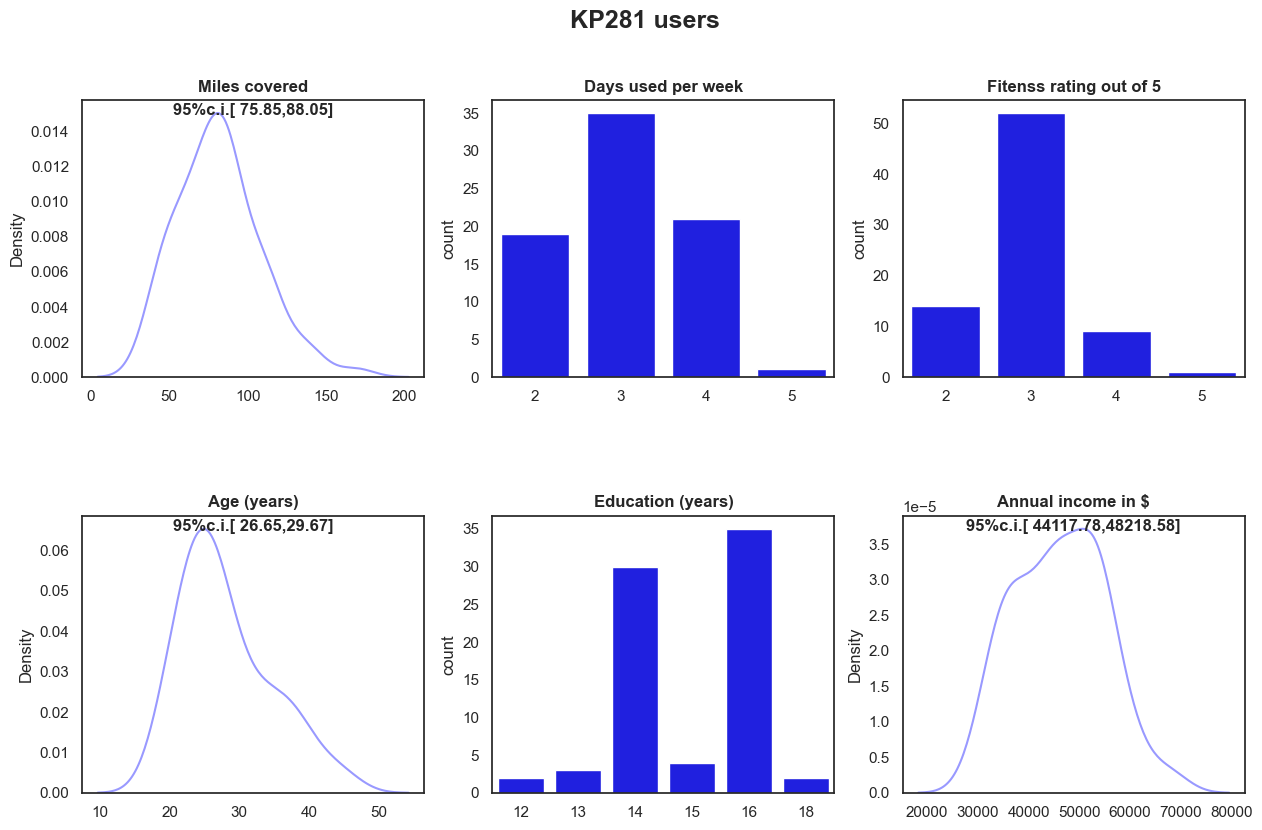

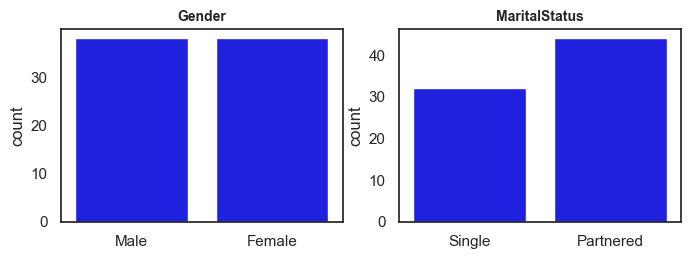

,Age,Education,Usage,Fitness,Income,Miles
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,28.157895,14.986842,3.052632,2.960526,46168.184211,81.947368
std,6.588986,1.227392,0.764107,0.598683,8937.483365,26.596188
min,18.000000,12.000000,2.000000,2.000000,29562.000000,38.000000
25%,23.000000,14.000000,2.750000,3.000000,38658.000000,66.000000
50%,26.000000,15.000000,3.000000,3.000000,46617.000000,85.000000
75%,32.250000,16.000000,4.000000,3.000000,52586.250000,94.000000
max,46.000000,18.000000,5.000000,5.000000,68220.000000,169.000000


In [29]:
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)  # vertical spacing
sns.set_style("white")

def plot_and_describe(data, model, column, i,color='blue'):
    n=len(data)
    
    # Plotting KDE and Count plots
    plt.subplot(2,3, i + 1)  # subplot
    sns.set_style("white")
    if column in ['Fitness', 'Usage','Education']:
        sns.countplot(x=data[column],color=color)
        if column=='Fitness':
            plt.title('Fitenss rating out of 5',fontweight='bold')
        elif column=='Usage':
            plt.title('Days used per week',fontweight='bold')
        else:
            plt.title('Education (years)',fontweight='bold')
    else:
        ax = sns.kdeplot(data=data, x=column,color=color,alpha=.4)
        if column=='Miles':
            plt.title(f'{column} covered', fontweight='bold', loc='center')
        elif column=='Age':
            plt.title(f'{column} (years)', fontweight='bold', loc='center')
        else:
            plt.title(f'Annual income in $', fontweight='bold', loc='center')
        # mean and standard deviation from CLT
        std_val=data[column].std(ddof=1)/np.sqrt(n)
        mean_val=data[column].mean()
        ax.text(.5,.99, f'95%c.i.[ {mean_val-2*std_val:.2f},{mean_val+2*std_val:.2f}]', transform=ax.transAxes, ha='center', va='top',weight='bold')
    plt.xlabel('')
    
    
        

columns = ['Miles', 'Usage', 'Fitness', 'Age', 'Education', 'Income']
model = 'KP281'
plt.suptitle(f'{model} users',fontweight='bold',fontsize=18)
for i, column in enumerate(columns):
    plot_and_describe(low, model, column, i)

plt.show()

plt.figure(figsize=(8,2.5))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=low, color='blue')
plt.title('Gender',fontweight='bold',fontsize=10)
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.countplot(x='MaritalStatus', data=low, color='blue')
plt.title('MaritalStatus',fontweight='bold',fontsize=10)
plt.xlabel('')

plt.show()
low.describe() 

## Profile of KP281 Users 

- **Age Distribution:**
  - The majority of KP281 users fall within the age range of 27-30 years.
  
- **Gender:**
  - Equal distribution of male and female users.

- **Education Level:**
  - Education level is 14 or 16 years for KP281 users.

- **Relationship Status:**
  - There is a higher proportion of partnered KP281 users compared to single users.

- **Usage Pattern:**
  - The average usage for KP281 users is around 3 times per week.

- **Fitness Level:**
  - The fitness level of KP281 users is around 3 out of 5.

- **Income Range:**
  - The income of KP281 users is 44k-48k $ per annum suggesting that this group consists of individuals with moderate income levels.

- **Miles Covered:**
  - The majority of KP281 users cover a distance of around 76-88 miles.


### KP481 [Price: $1750; second highest in terms of revenue and usage]

In [30]:
Counts=[mid['Age group'].value_counts().head(4),mid['Gender'].value_counts(),mid['Education'].value_counts(),mid['MaritalStatus'].value_counts()]
for i in Counts:
    print(i)

Age group
18-25    27
26-35    23
36-45     7
0-17      0
Name: count, dtype: int64
Gender
Male      30
Female    27
Name: count, dtype: int64
Education
16    30
14    22
13     2
12     1
18     1
15     1
Name: count, dtype: int64
MaritalStatus
Partnered    34
Single       23
Name: count, dtype: int64


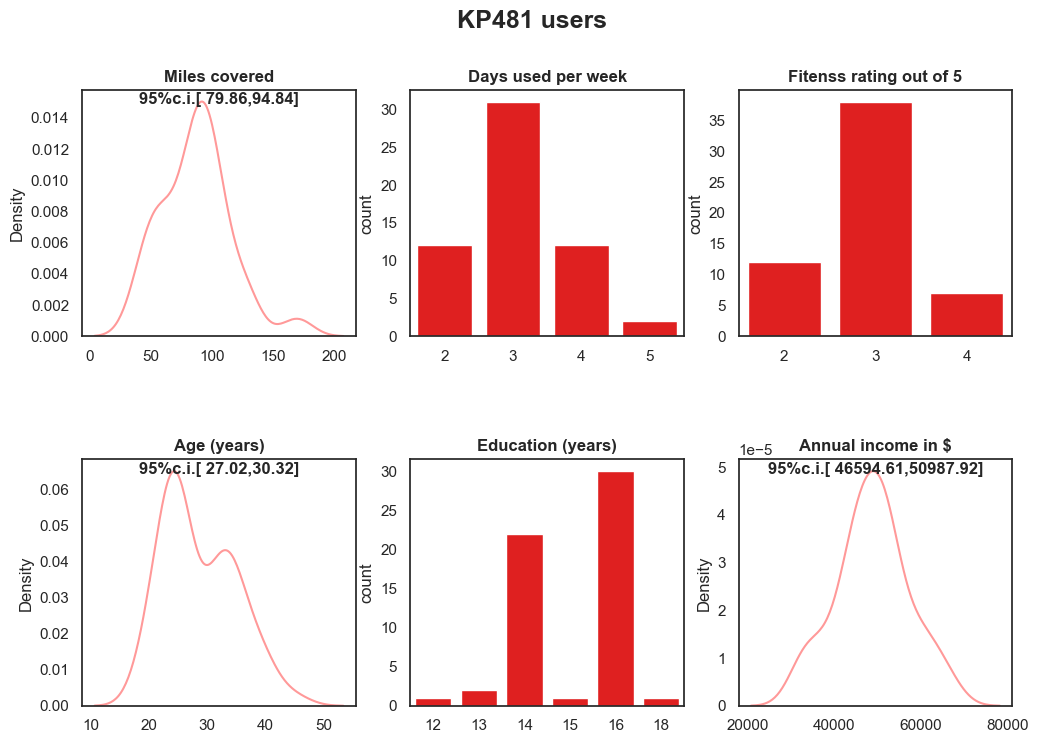

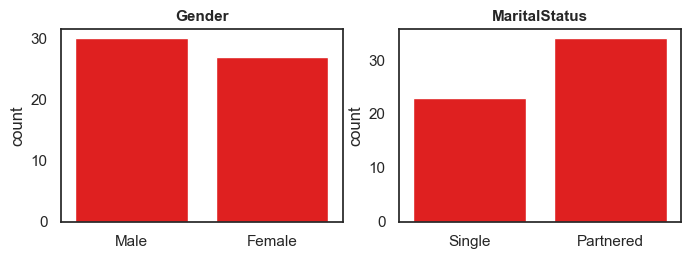

,Age,Education,Usage,Fitness,Income,Miles
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,28.666667,15.070175,3.070175,2.912281,48791.263158,87.350877
std,6.225906,1.178068,0.752606,0.575720,8292.199268,28.289000
min,19.000000,12.000000,2.000000,2.000000,31836.000000,42.000000
25%,24.000000,14.000000,3.000000,3.000000,45480.000000,64.000000
50%,26.000000,16.000000,3.000000,3.000000,48891.000000,85.000000
75%,33.000000,16.000000,3.000000,3.000000,53439.000000,106.000000
max,45.000000,18.000000,5.000000,4.000000,67083.000000,170.000000


In [31]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
model = 'KP481'
sns.set_style("white")

plt.suptitle(f'{model} users',fontweight='bold',fontsize=18)
for i, column in enumerate(columns):
    plot_and_describe(mid, model, column, i,'red')

plt.show()

plt.figure(figsize=(8,2.5))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=mid, color='red')
plt.title('Gender',fontweight='bold',fontsize=11)
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.countplot(x='MaritalStatus', data=mid, color='red')
plt.title('MaritalStatus',fontweight='bold',fontsize=11)
plt.xlabel('')

plt.show()

mid.describe()

## Profile of KP481 Users 

- **Age Distribution:**
  - The majority of KP481 users fall within the age range of 27 to 30 years.

- **Gender:**
  - Almost equal distribution with slightly more male users.

- **Education Level:**
  - Education level is 14 or 16 years for KP481 users.

- **Relationship Status:**
  - There is a higher proportion of partnered KP481 users compared to single users.

- **Usage Pattern:**
  - The average usage for KP481 users is around 3 times per week.

- **Fitness Level:**
  - The fitness level of KP481 users is around 3 out of 5.

- **Income Range:**
  - The income of KP481 users is centered around 47k-51k $ per annum.

- **Miles Covered:**
  - The majority of KP481 users cover a distance of around 80-95 miles.

### KP781 [Price: $2500; lowest in terms of revenue and usage]

In [32]:
Counts=[high['Age group'].value_counts().head(4),high['Gender'].value_counts(),high['Education'].value_counts(),high['MaritalStatus'].value_counts()]
for i in Counts:
    print(i)
high.describe()

Age group
18-25    11
26-35     2
0-17      0
36-45     0
Name: count, dtype: int64
Gender
Male      12
Female     1
Name: count, dtype: int64
Education
16    8
18    4
14    1
Name: count, dtype: int64
MaritalStatus
Single       8
Partnered    5
Name: count, dtype: int64


,Age,Education,Usage,Fitness,Income,Miles
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,24.230769,16.461538,4.230769,4.461538,55842.230769,126.615385
std,1.877669,1.198289,0.599145,0.776250,6000.430334,33.698512
min,22.000000,14.000000,3.000000,3.000000,48556.000000,80.000000
25%,23.000000,16.000000,4.000000,4.000000,49801.000000,100.000000
50%,24.000000,16.000000,4.000000,5.000000,54781.000000,120.000000
75%,25.000000,18.000000,5.000000,5.000000,61006.000000,160.000000
max,29.000000,18.000000,5.000000,5.000000,64741.000000,180.000000


## Using Bootstrapping since sample size <30

In [33]:
np.random.seed(95)
def calculate_bootstrap_ci(data, column, B=100000, alpha=0.05):
    # storing bootstrap sample means
    bootstrap_means = []
    
    for _ in range(B):
        bootstrap_sample = np.random.choice(data[column], size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))

    # Mean and Standard Deviation of Bootstrap Samples
    mean_final = np.mean(bootstrap_means)
    std_final = np.std(bootstrap_means,ddof=1)

    # 95% Confidence Interval
    lower_bound = mean_final - 2 * std_final
    upper_bound = mean_final + 2 * std_final

    print(f'95%(c.i.) for {column} : [ {lower_bound} , {upper_bound} ]')

for column in columns:
    calculate_bootstrap_ci(high, column)

95%(c.i.) for Miles : [ 108.66727678016743 , 144.56222475829412 ]
95%(c.i.) for Usage : [ 3.9111045566642413 , 4.549276981797297 ]
95%(c.i.) for Fitness : [ 4.047070234840964 , 4.874968226697497 ]
95%(c.i.) for Age : [ 23.22730042353944 , 25.231385730306712 ]
95%(c.i.) for Education : [ 15.822752431604206 , 17.099389106857334 ]
95%(c.i.) for Income : [ 52660.23020543988 , 59033.83568994472 ]


## Profile of KP781 Users 

- **Age Distribution:**
  - KP781 user's age is around 23-25 years.

- **Gender:**
  - KP781 users are mostly male.

- **Education Level:**
  - Education level is 16-17 years for KP781 users.

- **Relationship Status:**
  - There is a higher proportion of single KP781 users compared to partnered users.

- **Usage Pattern:**
  - The average usage for KP781 users is around 4-5 times per week.

- **Fitness Level:**
  - The fitness level of KP781 users is around 4-5 out of 5.

- **Income Range:**
  - The income of KP781 users is 53k-59k $ per annum.

- **Miles Covered:**
  - The KP781 users cover a distance of around 109-145 miles.

### Comparative Analysis of Treadmill User Profiles

#### KP281 Users:

- **Demographics:**
  - Majority in the age range of 27-30 years.
  - Almost equal gender distribution.
  - Education level is 14 or 16 years.

- **Lifestyle and Fitness:**
  - Higher proportion of partnered users.
  - Average usage around 3 times per week.
  - Moderate fitness levels (around 3/5).
  - Cover a moderate distance (76-88 miles).

- **Income and Recommendations:**
  - Income range: 44k to 48k $ per annum.
  - **Recommendation:** Focus on couples or individuals in late 20s, early 30s. Highlight user-friendly features and emphasize moderate fitness goals for a balanced lifestyle.

#### KP481 Users:

- **Demographics:**
  - Age group centered around 27-30 years.
  - Almost equal gender distribution with slightly higher number of male users.
  - Education level is 14 or 16 years.

- **Lifestyle and Fitness:**
  - Higher proportion of partnered users.
  - Average usage around 3 times per week.
  - Moderate fitness levels (around 3/5).
  - Cover a moderate distance (80-95 miles).

- **Income and Recommendations:**
  - Income range: 47k to 51k $ per annum.
  - **Recommendation:** Tailor marketing to appeal to couples or individuals in their late 20s to early 30s. Emphasize reliability and ease of use for a steady fitness routine.

#### KP781 Users:

- **Demographics:**
  - Younger age group around 23-25 years.
  - Predominantly male.
  - Higher education level range from 16-17 years.

- **Lifestyle and Fitness:**
  - Higher proportion of single users.
  - Average usage around 4-5 times per week.
  - Fitness levels are around 4-5 out of 5.
  - Cover a higher number of miles (109-145 miles).

- **Income and Recommendations:**
  - Income range: 53k to 59k $ per annum.
  - **Recommendation:** Targeted marketing for young, single, fitness-conscious individuals with higher salary. Consider promotions emphasizing performance and features for an active lifestyle.



### Overall Insights and Recommendations:

- **Diverse Targeting:**
  - Recognize the diversity among treadmill users and tailor marketing efforts accordingly.
  - For example marketing should be done differently for different age groups, MaritalStatuses, Salary bins and Genders.
  - A single male in mid 20s with salary more than 50k can be targeted to sell KP781.

- **Segmented Campaigns:**
  - Design specific marketing campaigns for each model based on user profiles and preferences.
  - For example KP281, KP481 can be campaigned specifically for partnered people in their late 20s, early 30s.
  - Use the Probabilities and Profiles to launch the campaigns.

- **Customer Engagement:**
  - Engage with the community by promoting fitness challenges or social events tailored to the identified user groups.

- **Promotions and Pricing:**
  - Offer targeted promotions, discounts, or loyalty programs to incentivize purchases.
  - For example Marital Status, Gender or Age can be used to introduce specific discounts in specific regions.